#Step 5: Addestramento modelli per il calcolo del CLV#

In [ ]:
from datetime import datetime, timedelta, date
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import metrics

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/Models.parquet")

In [ ]:
df.head()

id  n_restituzioni  Dummy_neg  ...  Monetary  T  purchaseamount_m4
0  4330474628               0          0  ...     21.84  7            1088.07
1  4330475834               0          0  ...     47.21  7             206.63
2  4330479043               0          0  ...    111.72  6            1488.44
3  4330479752               0          0  ...     32.01  6             365.53
4  4334046217               0          0  ...     29.17  5             904.44

[5 rows x 8 columns]

In [ ]:
df.describe()

id  n_restituzioni  ...             T  purchaseamount_m4
count  3.250900e+04    32509.000000  ...  32509.000000       32509.000000
mean   8.822100e+08        7.648651  ...    237.793319        1583.900832
std    8.986034e+08       12.096276  ...     21.441539        1438.372915
min    2.241898e+08        0.000000  ...      1.000000           0.000000
25%    4.968172e+08        1.000000  ...    240.000000         923.680000
50%    4.997409e+08        4.000000  ...    243.000000        1434.950000
75%    5.629778e+08       10.000000  ...    244.000000        2064.190000
max    4.338719e+09      902.000000  ...    245.000000      199213.640000

[8 rows x 8 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32509 entries, 0 to 32508
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 32509 non-null  int64  
 1   n_restituzioni     32509 non-null  int64  
 2   Dummy_neg          32509 non-null  int64  
 3   Recency            32509 non-null  int64  
 4   Frequency          32509 non-null  int64  
 5   Monetary           32509 non-null  float64
 6   T                  32509 non-null  int64  
 7   purchaseamount_m4  32509 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 2.2 MB


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


#Z= add_constant(df)
#pd.Series([variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])], index=Z.columns)




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**Divisione di variabie dipendente(y) e variabili indipendenti(X)**

In [ ]:
Regressors=['n_restituzioni','Dummy_neg','Recency','Frequency','Monetary','T']
var_num=['n_restituzioni','Recency','Frequency','Monetary','T']
X=df.drop('purchaseamount_m4', axis=1)
y=df['purchaseamount_m4']
#Splitto in train e test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=29)


**Calcolo di correlazioni tra variabili con Vif alto e possibili ridondanze**

In [ ]:
import plotly.express as px
fig = px.scatter(x=X_train['Monetary'], y=y_train,range_y=(0,8000),labels={'x':'Monetary', 'y':'Purchaeamount_m4'},width=800,height=400)

fig.show()

In [ ]:
#Calcolo la matrice di correlazione
corr_matrix = df.corr()
corr_matrix["purchaseamount_m4"].sort_values(ascending=False)

purchaseamount_m4    1.000000
Frequency            0.873577
Monetary             0.567348
n_restituzioni       0.443854
Dummy_neg            0.101407
T                    0.085097
id                  -0.086296
Recency             -0.125043
Name: purchaseamount_m4, dtype: float64

In [ ]:
corr_matrix["Monetary"].sort_values(ascending=False)

Monetary             1.000000
Frequency            0.765646
purchaseamount_m4    0.567348
T                    0.260934
n_restituzioni       0.241047
Dummy_neg            0.201466
id                  -0.182654
Recency             -0.238156
Name: Monetary, dtype: float64

In [ ]:
corr_matrix = df.corr()
corr_matrix['Dummy_neg'].sort_values(ascending=False)

Dummy_neg            1.000000
n_restituzioni       0.332054
Monetary             0.201466
Frequency            0.177540
T                    0.169388
purchaseamount_m4    0.101407
id                  -0.093188
Recency             -0.127896
Name: Dummy_neg, dtype: float64

In [ ]:
fig = px.imshow(corr_matrix)
fig.show()

In [ ]:
len(X_train), len(y_train) #Verifico che le lunghezze corrispondano

(24381, 24381)

**Standardizzazione delle variabili quantitative**

In [ ]:
from pandas.preprocessing import StandardScaler()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scl= StandardScaler()
X_train[var_num] = std_scl.fit_transform(X_train[var_num])
X_test[var_num] =std_scl.transform(X_test[var_num])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
max(X_train['Monetary']), min(X_train['Monetary']) 

(3.1757716152013513, -1.7305901411334774)

In [ ]:
X_train['Frequency'].describe()

count    2.438100e+04
mean    -7.277628e-17
std      1.000021e+00
min     -1.318295e+00
25%     -5.651343e-01
50%     -1.282276e-01
75%      4.201908e-01
max      9.794543e+01
Name: Frequency, dtype: float64

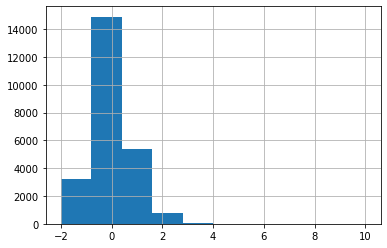

In [ ]:
X_train['Frequency'].hist(range=(-2,10))

In [ ]:
fig = px.scatter(x=X_train['Monetary'], y=y_train,range_y=(0,8000),labels={'x':'Monetary', 'y':'Purchaeamount_m4'})
fig.show()

## **Modelli lineari**

In [ ]:
#Modello lineare con dummy
var_2=['Dummy_neg','Recency','Frequency','Monetary','T']
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(X_train[var_2], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(1673.4479181677996,
 array([-111.31153724,   38.49664266, 1705.21343945, -370.18910469,
        -116.52730905]))

In [ ]:
#var_num=['Dummy_neg','Recency','Frequency','Monetary','T']


In [ ]:
X_train['Prediction']= lin_reg.predict(X_train[var_num])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Misuriamo l'errore della predizione
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_train, X_train['Prediction'])
lin_rmse = np.sqrt(lin_mse)
lin_rmse

691.2263868108859

In [ ]:
#Calcolare l'R^2
from sklearn.metrics import r2_score
score_R2=r2_score(y_train, X_train['Prediction'])
score_R2

0.8080977017842661

In [ ]:
#Test
X_test['Prediction']= lin_reg.predict(X_test[var_num])
lin_mse = mean_squared_error(y_test, X_test['Prediction'])
lin_rmse = np.sqrt(lin_mse)
lin_rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



621.933083742267

In [ ]:
score_R2=r2_score(y_test, X_test['Prediction'])
score_R2

0.5201958917353255

**Modello lineare semplice(base di confronto con gli altri modelli)**

In [ ]:
#Lineare con T senza dummy
lin_reg= LinearRegression()
lin_reg.fit(X_train[var_num], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(1586.360941716909,
 array([  89.39212174,   43.28628975, 1646.43731544, -354.71261819,
        -124.45620143]))

In [ ]:
#Calcolare la Significativita'
#var_num=['n_restituzioni','Recency','Frequency','Monetary','T']#controllare l'ordine
#Poi scatter plot o decili

In [ ]:
df_merge=pd.merge(y_train,X_train, on=y_train.index)

**Output tipo R per cercare variabili non significative**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
results = smf.ols('purchaseamount_m4~ n_restituzioni+ Recency+Monetary+Frequency+T',data=df_merge).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      purchaseamount_m4   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                 2.288e+04
Date:                Thu, 15 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:46:32   Log-Likelihood:            -1.9293e+05
No. Observations:               24381   AIC:                         3.859e+05
Df Residuals:                   24375   BIC:                         3.859e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1586.3609      4.236    374.

In [ ]:
from patsy import dmatrices
y_lin, X_lin = dmatrices('purchaseamount_m4~ n_restituzioni+ Recency+Monetary+Frequency+T',data=df_merge,return_type='dataframe')

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_lin.values, i) for i in range(X_lin.shape[1])]
vif["features"] = X_lin.columns
vif


VIF Factor        features
0    1.000000       Intercept
1    1.329080  n_restituzioni
2    1.069291         Recency
3    2.311981        Monetary
4    2.677252       Frequency
5    1.078275               T

In [ ]:
X_train['Monetary'].describe() #Prima della standardizzazione

count    2.438100e+04
mean    -9.058557e-17
std      1.000021e+00
min     -1.730590e+00
25%     -7.463013e-01
50%     -1.597856e-01
75%      5.689792e-01
max      3.175772e+00
Name: Monetary, dtype: float64

In [ ]:
y_pred=lin_reg.predict(X_train[var_num])

In [ ]:
#Radice dell'Eqm
lin=['Modello Lineare']
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin.append(lin_rmse)
lin_rmse

661.3527800118875

In [ ]:
#R2 train
from sklearn.metrics import r2_score
score_R2=r2_score(y_train, y_pred)
lin.append(score_R2)
score_R2

0.8243266327623944

In [ ]:
#Test
y_pred_test=lin_reg.predict(X_test[var_num])
lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmse = np.sqrt(lin_mse)
lin.append(lin_rmse)
lin_rmse

605.5203754078434

In [ ]:
score_R2=r2_score(y_test, y_pred_test)
lin.append(score_R2)
score_R2

0.5451856427331038

In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lin_reg, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
regr_rmse_scores = np.sqrt(-scores)
lin.append(regr_rmse_scores.mean())

In [ ]:
lin

['Modello Lineare',
 661.3527800118875,
 0.8243266327623944,
 605.5203754078434,
 0.5451856427331038,
 893.1180391680273]

In [ ]:
X_train,X_test=X_train[var_num],X_test[var_num]

**Modello lineare con transformata quantile**

In [ ]:
#Modello lineare con y quantili
import numpy as np
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.compose import TransformedTargetRegressor

y_trans = quantile_transform(y_train.to_frame(),
                             n_quantiles=900,
                             output_distribution='normal',
                             copy=True).squeeze()
#regr_trans = TransformedTargetRegressor(regressor=RidgeCV(),
                                        #func=np.log1p,
                                        #inverse_func=np.expm1)

regr_trans = TransformedTargetRegressor(
    regressor=LinearRegression(),
    transformer=QuantileTransformer(n_quantiles=900,
                                    output_distribution='normal'))
regr_trans.fit(X_train,y_train)
y_pred = regr_trans.predict(X_train)
y_pred_test = regr_trans.predict(X_test)

In [ ]:
regr_trans.regressor_.coef_, regr_trans.regressor_.intercept_

(array([-0.00482343, -0.03703536,  0.03188539,  0.85132955, -0.07527755]),
 -0.001033624036190562)

**Confronto della distribuzione di y prima e dopo**

Text(-6.8, 0.479, 'Transformed target distribution')

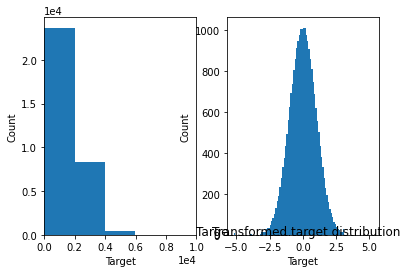

In [ ]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100)
ax0.set_ylabel('Count')
ax0.set_xlabel('Target')
ax0.set_xlim(0,10000)
ax0.text(s='Target distribution', x=10000, y=9.8e-6, fontsize=12)
ax0.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))

ax1.hist(y_trans, bins=100)
ax1.set_ylabel('Count')
ax1.set_xlabel('Target')
ax1.text(s='Transformed target distribution', x=-6.8, y=0.479, fontsize=12)

In [ ]:
y_t= np.array(y_trans)
y_t=pd.DataFrame(y_t,columns=['purchaseamount'])
fig = px.histogram(y_t, x=y_t['purchaseamount'],width=600, height=300)
fig.show()

In [ ]:
y_t= np.array(y_train)
y_t=pd.DataFrame(y_t,columns=['purchaseamount'])
fig = px.histogram(y_t, x=y_t['purchaseamount'],width=600, height=300, range_x=(0,20000))
fig.show()

In [ ]:
y_t.describe()

purchaseamount
count    24381.000000
mean      1586.360942
std       1577.935065
min          0.000000
25%        922.770000
50%       1438.980000
75%       2064.100000
max     199213.640000

In [ ]:
#Errore quadratico medio train
lin_scores=['ML con quantili']
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_scores.append(lin_rmse)
lin_rmse

670.2323825589558

In [ ]:
#R2 train
score_R2_lin=r2_score(y_train, y_pred)
lin_scores.append(score_R2_lin)
score_R2_lin

0.8195776342530636

In [ ]:
#EQM test
lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmset = np.sqrt(lin_mse)
lin_scores.append(lin_rmset)
lin_rmset

446.83556253597084

In [ ]:
#R2 test
score_R2_lint=r2_score(y_test, y_pred_test)
lin_scores.append(score_R2_lint)
score_R2_lint

0.7523307418704478

In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(regr_trans, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
regr_rmse_scores = np.sqrt(-scores)
lin_scores.append(regr_rmse_scores.mean())
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Dev:", scores.std())

In [ ]:
lin_scores

['ML con quantili',
 670.2323825589558,
 0.8195776342530636,
 446.83556253597084,
 0.7523307418704478,
 855.6254845128491]

In [ ]:
#La stima puntuale non mi dice molto: faccio la stima intrvallare
from scipy import stats
confidence= 0.95
squared_errors= (y_pred_test - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([431.23998667, 461.90487526])

**Modello log-lin**

In [ ]:
#Modello lineare con y logaritmica
import numpy as np
from sklearn.preprocessing import QuantileTransformer, quantile_transform
from sklearn.compose import TransformedTargetRegressor

#Fare tutti i passaggi senza transformer
y_trans= np.log1p(y_train)
y_test_trans=np.log1p(y_test)
lin_reg= LinearRegression()
lin_reg.fit(X_train, y_trans)
y_pred = lin_reg.predict(X_train)
y_pred_test= lin_reg.predict(X_test)
#regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        #func=np.log1p,
                                        #inverse_func=np.expm1)

#regr_trans.fit(X_train, y_train)
#y_pred = regr_trans.predict(X_train)



In [ ]:
lin_reg.intercept_,lin_reg.coef_ 

(7.181983760117081,
 array([ 0.00290303, -0.05059474,  0.03759537,  0.49631297, -0.03205385]))

In [ ]:
y_t= np.array(y_trans)
y_t

array([7.29674542, 7.76419834, 6.46825758, ..., 7.96103891, 8.26350022,
       7.08785771])

In [ ]:
y_t= np.array(y_trans)
y_t=pd.DataFrame(y_t,columns=['purchaseamount'])
fig = px.histogram(y_t, x=y_t['purchaseamount'],width=600, height=300)
fig.show()

In [ ]:
y_tr= np.array(y_train)
y_tr=pd.DataFrame(y_tr,columns=['purchaseamount'])
fig = px.histogram(y_tr, x=y_tr['purchaseamount'],width=600, height=300,range_x=(0,6000))
fig.show()

In [ ]:
#Nel modello log-lin i beta si interpretano come 100*beta% variazione di y

In [ ]:
#Radice dell'EQM train
log_lin=['ML log-lin']
lin_mse = mean_squared_error(y_train, np.expm1(y_pred))
lin_rmse = np.sqrt(lin_mse)
log_lin.append(lin_rmse)
lin_rmse

969.4351268803767

In [ ]:
#R2 train
r2=r2_score(y_trans,y_pred)
log_lin.append(r2)
r2

0.6378314046776559

In [ ]:
#Radice dell'EQM test
lin_mse = mean_squared_error(y_test, np.expm1(y_pred_test))
lin_rmset = np.sqrt(lin_mse)
log_lin.append(lin_rmset)
lin_rmset

593.3610435363246

In [ ]:
#R2 test
r2_test=r2_score(y_test_trans,y_pred_test)
log_lin.append(r2_test)
r2_test

0.6427120471538172

In [ ]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scores= cross_val_score(lin_reg, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
log_lin_rmse_scores = np.sqrt(-scores)
log_lin.append(log_lin_rmse_scores.mean())


In [ ]:
log_lin

['ML log-lin',
 969.4351268803767,
 0.6378314046776559,
 593.3610435363246,
 0.6427120471538172,
 897.7724224838845]

**Statistiche**

In [ ]:
results = smf.ols('np.log1p(purchaseamount_m4)~ n_restituzioni+ Recency+Monetary+Frequency+T',data=df_merge).fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:     np.log1p(purchaseamount_m4)   R-squared:                       0.638
Model:                                     OLS   Adj. R-squared:                  0.638
Method:                          Least Squares   F-statistic:                     8586.
Date:                         Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                                 08:59:58   Log-Likelihood:                -12314.
No. Observations:                        24381   AIC:                         2.464e+04
Df Residuals:                            24375   BIC:                         2.469e+04
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
#La variabile n_restituzioni risulta non significativa

**Modellazione dei residui del modello log-lin**



In [ ]:
#Residui
y_e_train=y_trans- y_pred
y_e_test=y_test_trans -y_pred_test

#Modello
from sklearn.ensemble import RandomForestRegressor
rnd_forest= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=14,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=-1, oob_score=False, 
                      random_state=None, verbose=0, warm_start=False)
rnd_forest.fit(X_train,y_e_train)
y_pred_e=rnd_forest.predict(X_train)
y_pred_test_e=rnd_forest.predict(X_test)

In [ ]:
features=rnd_forest.feature_importances_
sorted(zip(features, var_num), reverse=True)

[(0.8341115466901587, 'Monetary'),
 (0.09680580119635311, 'T'),
 (0.0667894824062504, 'Recency'),
 (0.0017120422322834197, 'Frequency'),
 (0.0005811274749543288, 'n_restituzioni')]

In [ ]:
y_e_train.describe()

count    2.438100e+04
mean     8.064679e-16
std      4.009696e-01
min     -7.036272e+00
25%     -1.641694e-01
50%      4.631344e-02
75%      2.185521e-01
max      2.527522e+00
Name: purchaseamount_m4, dtype: float64

In [ ]:
fig = px.histogram(y_e_train, x=y_e_train)
fig.show()

In [ ]:
#R2 train
r2=r2_score(y_trans,  y_pred+y_pred_e)
r2

0.7182389833082282

In [ ]:
#R2 test
r2=r2_score(y_test_trans,  y_pred_test+y_pred_test_e) #Rimandare
r2

0.7089306113296439

# **Modelli ad albero**

**RANDOM FOREST con y logaritmica**

In [ ]:
#RANDOM FOREST con y logaritmica 
#from sklearn.ensemble import RandomForestRegressor
#import numpy as np
#y_test_trans= np.log1p(y_test)
#rnd_forest= RandomForestRegressor(n_estimators=100, n_jobs=-1,max_depth=5,min_samples_split=0.05)
#rnd_forest.fit(X_train,y_trans)
#y_pred=rnd_forest.predict(X_train)
#y_pred_test=rnd_forest.predict(X_test)


**Importanza variabili**

In [ ]:
#rnd_forest.feature_importances_ 

In [ ]:
#features=rnd_forest.feature_importances_
#df=pd.DataFrame()
#df['values']=features
#df['features']=var_num
#df= df.sort_values(by='values')
#df

**RANDOM FOREST**

In [ ]:
rnd_forest= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                      n_estimators=1100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)
rnd_forest.fit(X_train,y_train)
y_pred=rnd_forest.predict(X_train)
y_pred_test=rnd_forest.predict(X_test)


**Importanza delle variabili**

In [ ]:
features=rnd_forest.feature_importances_
sorted(zip(features, var_num), reverse=True)


[(0.4907541523554971, 'Monetary'),
 (0.33631290019136095, 'Frequency'),
 (0.16258057111484558, 'n_restituzioni'),
 (0.009612707561048183, 'T'),
 (0.0007396687772481625, 'Recency')]

In [ ]:
df=pd.DataFrame()
df['values']=features
df['features']=var_num
df= df.sort_values(by='values',ascending=False)
df

values        features
3  0.490754        Monetary
2  0.336313       Frequency
0  0.162581  n_restituzioni
4  0.009613               T
1  0.000740         Recency

In [ ]:
import plotly.express as px
fig = px.bar(df, x='values', y='features',
             color='features', orientation='h',
             title='Importanza features', height=400,width=800)
fig.show()

In [ ]:
#Radice dell'EQM train
forest=['Random Forest']
for_mse = mean_squared_error(y_train, y_pred)
for_rmse = np.sqrt(for_mse)
forest.append(for_rmse)
for_rmse

602.1982919963513

In [ ]:
#R2 train
r2=r2_score(y_train,  y_pred)
forest.append(r2)
r2

0.8543472805521408

In [ ]:
#Radice dell'EQM test
for_mse = mean_squared_error(y_test,y_pred_test)
for_rmse = np.sqrt(for_mse)
forest.append(for_rmse)
for_rmse

417.77725778049904

In [ ]:
#R2 test
r2=r2_score(y_test, y_pred_test)
forest.append(r2)
r2

0.7834958463997881

In [ ]:
#CROSS VALIDATION
scores= cross_val_score(rnd_forest, X_train, y_train,
                       scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest.append(forest_rmse_scores.mean())

In [ ]:
forest

['Random Forest',
 602.1982919963513,
 0.8543472805521408,
 417.77725778049904,
 0.7834958463997881,
 778.1717727778446]

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Dev:", scores.std())

display_scores(forest_rmse_scores)

Scores: [ 422.51797089 3506.64352153  532.49704873  401.74078506  408.76422664
  466.03955645  755.54316044  461.68399468  412.30005535  413.98740803]
Mean: 778.1717727778446
Standard Dev: 915.1044452759629


**Random Forest senza Frequency**

In [ ]:
var_3=['Recency','Monetary','n_restituzioni','T']
rnd_forest= RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=14,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                      n_estimators=900, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)
rnd_forest.fit(X_train[var_3],y_train)
y_pred=rnd_forest.predict(X_train[var_3])
y_pred_test=rnd_forest.predict(X_test[var_3])

**Importanze delle features**

In [ ]:
features=rnd_forest.feature_importances_
sorted(zip(features, var_3), reverse=True)

[(0.4999046428532638, 'Monetary'),
 (0.49347457760073243, 'n_restituzioni'),
 (0.006615030650497267, 'T'),
 (5.748895506576146e-06, 'Recency')]

In [ ]:
#Radice dell'EQM train
forest2=['Random Forest2']
for_mse = mean_squared_error(y_train, y_pred)
for_rmse = np.sqrt(for_mse)
forest2.append(for_rmse)
for_rmse

638.2360791033184

In [ ]:
#R2 train
r2=r2_score(y_train,  y_pred)
forest2.append(r2)
r2

0.8363928570153317

In [ ]:
#Radice dell'EQM test
for_mse = mean_squared_error(y_test,y_pred_test)
for_rmse = np.sqrt(for_mse)
forest2.append(for_rmse)
for_rmse

421.37461057326817

In [ ]:
#R2 test
r2=r2_score(y_test, y_pred_test)
forest2.append(r2)
r2

0.7797512911759058

In [ ]:
#CROSS VALIDATION
scores= cross_val_score(rnd_forest, X_train[var_3], y_train,
                       scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
forest2.append(forest_rmse_scores.mean())

In [ ]:
forest2

['Random Forest2',
 638.2360791033184,
 0.8363928570153317,
 421.37461057326817,
 0.7797512911759058,
 822.4192416419164]

In [ ]:
#La prestazione generale del modello senza Frquency peggiora

**Modello lineare senza Monetary**

In [ ]:
var_4=['n_restituzioni','Frequency','Recency','T']
lin_reg= LinearRegression()
lin_reg.fit(X_train[var_4], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(1586.360941716909,
 array([ 138.17549021, 1378.7634603 ,   75.95175353, -162.24769237]))

In [ ]:
results = smf.ols('purchaseamount_m4~ n_restituzioni+ Recency+Frequency+T',data=df_merge).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      purchaseamount_m4   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 2.476e+04
Date:                Fri, 21 May 2021   Prob (F-statistic):               0.00
Time:                        09:11:06   Log-Likelihood:            -1.9436e+05
No. Observations:               24381   AIC:                         3.887e+05
Df Residuals:                   24376   BIC:                         3.888e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1586.3609      4.492    353.

In [ ]:
#Predizioni
y_pred= lin_reg.predict(X_train[var_4])
y_pred_test= lin_reg.predict(X_test[var_4])

In [ ]:
#Radice dell'EQM train
lin_2=['Lineare senza Monetary']
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_2.append(lin_rmse)
lin_rmse

701.2908123118432

In [ ]:
#R2 train
score_R2=r2_score(y_train, y_pred)
lin_2.append(score_R2)
score_R2

0.8024687294232953

In [ ]:
#Radice dell'EQM test
lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmse = np.sqrt(lin_mse)
lin_2.append(lin_rmse)
lin_rmse

587.6937913353574

In [ ]:
#R2 test
score_R2=r2_score(y_test, y_pred_test)
lin_2.append(score_R2)
score_R2

0.5715710119335706

In [ ]:
#CROSS VALIDATION
scores= cross_val_score(lin_reg, X_train[var_4], y_train,
                       scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
lin_2.append(forest_rmse_scores.mean())
display_scores(forest_rmse_scores)


Scores: [ 609.81797764 2022.86304372  666.93261554  613.44576142  595.45924433
  640.73051712  617.85264459  636.89430414  623.0840822   615.89765693]
Mean: 764.2977847632635
Standard Dev: 419.9409347796205


In [ ]:
lin_2

['Lineare senza Monetary',
 701.2908123118432,
 0.8024687294232953,
 587.6937913353574,
 0.5715710119335706,
 764.2977847632635]

In [ ]:
#Il modello lineare invece migliora le sue prestazioni

In [ ]:
#Lineare con T senza dummy
lin_reg= LinearRegression()
lin_reg.fit(X_train[var_num], y_train)
y_pred = lin_reg.predict(X_train[var_num])
y_pred_test= lin_reg.predict(X_test[var_num])


In [ ]:
lin_reg.intercept_, lin_reg.coef_

(1586.360941716909,
 array([  89.39212174,   43.28628975, 1646.43731544, -354.71261819,
        -124.45620143]))

In [ ]:
#Residui
y_e_train=y_train - y_pred
y_e_test=y_test - y_pred_test

#Modello
from sklearn.ensemble import RandomForestRegressor
rnd_forest=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=8,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=0.01, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)
rnd_forest.fit(X_train,y_e_train)
y_pred_e=rnd_forest.predict(X_train)
y_pred_test_e=rnd_forest.predict(X_test)

In [ ]:
features=rnd_forest.feature_importances_
sorted(zip(features, var_num), reverse=True)

[(0.5535927982915417, 'Frequency'),
 (0.351366157012944, 'Monetary'),
 (0.05888194366129413, 'n_restituzioni'),
 (0.036159101034220244, 'T'),
 (0.0, 'Recency')]

In [ ]:
df=pd.DataFrame()
df['values']=features
df['features']=var_num
df= df.sort_values(by='values',ascending=False)
df

values        features
2  0.553593       Frequency
3  0.351366        Monetary
0  0.058882  n_restituzioni
4  0.036159               T
1  0.000000         Recency

In [ ]:
fig = px.bar(df, x='values', y='features',
             color='features', orientation='h',
             title='Importanza features', height=400,width=800)
fig.show()

In [ ]:
y_e_train.describe()

count    2.438100e+04
mean     2.271592e-13
std      6.613663e+02
min     -5.392020e+03
25%     -3.363605e+02
50%     -1.672108e+01
75%      3.148197e+02
max      3.115580e+04
Name: purchaseamount_m4, dtype: float64

In [ ]:
fig = px.histogram(y_e_train, x=y_e_train,range_x=(-2000,2000),width=800,height=400)
fig.show()

In [ ]:
#Radice dell'EQM train
lin_e=['Lineare con RF errori']
lin_mse = mean_squared_error(y_train, y_pred+y_pred_e)
lin_rmse = np.sqrt(lin_mse)
lin_e.append(lin_rmse)
lin_rmse

536.04560521633

In [ ]:
#R2 train
r2=r2_score(y_train,  y_pred_e+y_pred)
lin_e.append(r2)
r2

0.884590106985851

In [ ]:
#Radice dell'EQM test
lin_mse = mean_squared_error(y_test, y_pred_test+y_pred_test_e)
lin_rmse = np.sqrt(lin_mse)
lin_e.append(lin_rmse)
lin_rmse

519.9465706541909

In [ ]:
#R2 test
r2=r2_score(y_test,  y_pred_test_e+y_pred_test)
lin_e.append(r2)
r2

0.6646532675348946

In [ ]:
lin_e

['Lineare con RF errori',
 536.04560521633,
 0.884590106985851,
 519.9465706541909,
 0.6646532675348946]

## **Confronto performance modelli**

In [ ]:
df_scores=[lin,lin_2,log_lin,lin_e,lin_scores,forest]
df_scores = pd.DataFrame(df_scores,columns=['Modello','Rmse train', 'R2 train','Rmse test','R2 test','Cross Val score'])
#senza monetary e frequency feature selection
df_scores

Modello  Rmse train  ...   R2 test  Cross Val score
0         Modello Lineare  661.352780  ...  0.545186       893.118039
1  Lineare senza Monetary  701.290812  ...  0.571571       764.297785
2              ML log-lin  969.435127  ...  0.642712       897.772422
3   Lineare con RF errori  536.045605  ...  0.664653              NaN
4         ML con quantili  670.232383  ...  0.752331       855.625485
5           Random Forest  602.198292  ...  0.783496       778.171773

[6 rows x 6 columns]

**Tipo dati 1**-> Monetary cappata al 99o percentile

In [ ]:
#Models4
#Modello	Rmse train	R2 train	Rmse test	R2 test	Cross Val score
#0	Modello Lineare	661.339155	0.824334	605.519370	0.545187	893.041
#1	ML log-lin	965.652479	0.625475	592.778814	0.564125	853.298
#2	Lineare con RF errori	535.229886	0.884941	519.532531	0.665187	None
#3	Lineare senza Monetary	701.290812	0.802469	587.693791	0.571571	
#4	ML con quantili	665.042543	0.822361	446.693008	0.752489	853.298
#5	RandomForest log	1349.284872	0.701482	434.144606	0.698320	829.437
#6	Random Forest	587.775180	0.861241	421.329858	0.779798	783.037
#7	Random Forest2	622.390889	0.844416	421.497817	0.779622	822.531

**Tipo di dati 2**-> outlier singole transazioni cappati al 99o percentile e Monetary cappata al 99o percentile

In [ ]:
	#Models
  #Modello	Rmse train	R2 train	Rmse test	R2 test	Cross Val score
#0	Modello Lineare	594.464750	0.838250	552.010635	0.596587	800.496538
#1	ML log-lin	741.309721	0.748469	562.693585	0.580821	766.574857
#2	Lineare con RF errori	493.132110	0.888694	483.167846	0.690934	NaN
#3	Lineare senza Monetary	631.853285	0.817264	537.279963	0.617830	687.449875
#4	ML con quantili	565.844398	0.853450	422.041747	0.764188	766.574857
#5	RandomForest log	1248.171641	0.704528	414.530237	0.700257	774.863926
#6	Random Forest	544.157617	0.864468	399.165634	0.789059	732.108845
#7	Random Forest2	587.653887	0.841935	399.288871	0.788928	772.871697

**Tipo dati 3**-> eliminazione degli id 496197822 e 560161366 che presentano valori di Frequency e Monetary estremamente alti e fanno aumentare la varianza degli stimatori, Monetary cappata al 99o percentile

In [ ]:
#Model 6 senza 2 id
#Modello	Rmse train	R2 train	Rmse test	R2 test	Cross Val score
#0	Modello Lineare	413.170397	0.778414	395.977292	0.793525	412.725674
#1	ML log-lin	559.129136	0.594203	555.117050	0.594215	433.729944
#2	Lineare con RF errori	397.754830	0.794640	384.884693	0.804931	NaN
#3	Lineare senza Monetary	485.608327	0.693905	459.007651	0.722562	485.277289
#4	ML con quantili	433.809565	0.755723	424.092441	0.763164	433.729944
#5	RandomForest log	427.899439	0.704425	410.794173	0.699151	426.946308
#6	Random Forest	392.449454	0.800082	394.641886	0.794915	410.016195
#7	Random Forest2	406.484723	0.785527	402.357634	0.786818	415.167906

**Tipo di dati 4**->tutte le variabili RFM cappate al 99o percentile

In [ ]:
#Modello	Rmse train	R2 train	Rmse test	R2 test	Cross Val score
#0	Modello Lineare	1203.860371	0.417908	658.950238	0.461381	1074.186531
#1	Lineare senza Monetary	1236.893312	0.385525	712.058981	0.371061	1115.587687
#2	ML log-lin	1312.434916	0.308177	585.746681	0.574405	845.951549
#3	Lineare con RF errori	639.051485	0.835975	431.677095	0.768850	NaN
#4	ML con quantili	1336.098089	0.283005	445.626561	0.753669	845.951549
#5	RandomForest log	1351.005833	0.701517	435.543228	0.697038	843.346679
#6	Random Forest	589.202984	0.860566	418.359130	0.782892	817.588373
#7	Random Forest2	643.594667	0.833634	421.381514	0.779744	823.825717